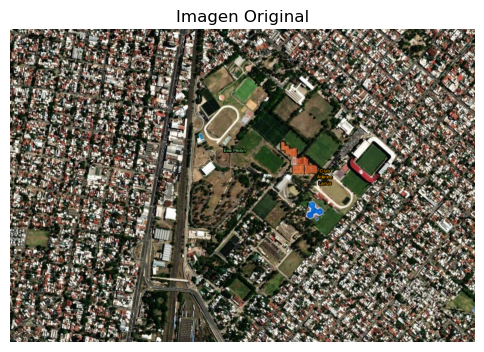

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer la imagen en color
imagen_rgb = cv2.imread('lanus.png')

# Verificar si la imagen se ha cargado correctamente
if imagen_rgb is None:
    print("Error al cargar la imagen.")
    exit()

# Mostrar las imágenes en gráficos separados
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(imagen_rgb, cv2.COLOR_BGR2RGB))
plt.title('Imagen Original')
plt.axis('off')
plt.show()

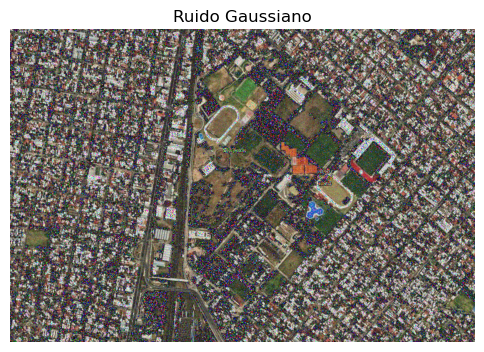

In [2]:
# Agregar ruido Gaussiano aditivo
def add_gaussian_noise(image, mean, stddev, contamination_percentage):
    # Genera ruido gaussiano
    gaussian_noise = np.random.normal(mean, stddev, image.shape)

    # Calcula la máscara de contaminación
    mask = np.random.rand(*image.shape) < (contamination_percentage / 100)

    # Agrega el ruido a la imagen solo en los puntos especificados por la máscara
    noisy_image = np.copy(image)
    noisy_image[mask] = image[mask] + gaussian_noise[mask]

    # Asegura que los valores se mantengan en el rango [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    return noisy_image

# Aplicar el ruido gaussiano a la imagen en escala de grises
imagen_ruido_gaussiano = add_gaussian_noise(imagen_rgb, 0, 25, 70)

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(imagen_ruido_gaussiano, cv2.COLOR_BGR2RGB))
plt.title('Ruido Gaussiano')
plt.axis('off')
plt.show()

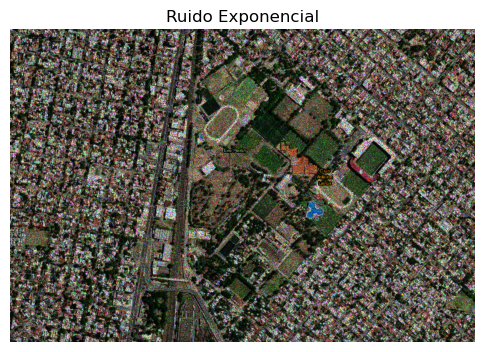

In [3]:
# Agregar ruido exponencial multiplicativo
# Función para agregar ruido exponencial multiplicativo
def add_exponential_noise(image, scale, contamination_percentage):
    # Genera ruido exponencial
    exponential_noise = np.random.exponential(scale, image.shape)

    # Calcula la máscara de contaminación
    mask = np.random.rand(*image.shape) < (contamination_percentage / 100)

    # Agrega el ruido a la imagen solo en los puntos especificados por la máscara
    noisy_image = np.copy(image)
    noisy_image[mask] = image[mask] * exponential_noise[mask]

    # Asegura que los valores se mantengan en el rango [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

    return noisy_image

# Aplicar el ruido exponencial a la imagen en escala de grises
imagen_ruido_exponencial = add_exponential_noise(imagen_rgb, 1.0, 50)

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(imagen_ruido_exponencial, cv2.COLOR_BGR2RGB))
plt.title('Ruido Exponencial')
plt.axis('off')
plt.show()

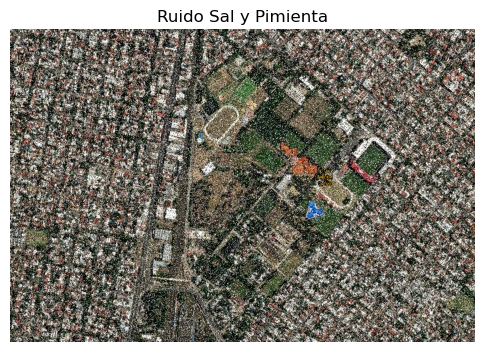

In [4]:
# Agregar ruido sal y pimienta
def agregar_ruido_sal_pimienta(imagen, prob=0.1):
    imagen_ruido = np.copy(imagen)
    num_salt = int(np.ceil(prob * imagen.size * 0.5))
    num_pepper = int(np.ceil(prob * imagen.size * 0.5))

    # Coordenadas de sal
    salt_coords = (np.random.randint(0, imagen.shape[0], num_salt),
                   np.random.randint(0, imagen.shape[1], num_salt))
    imagen_ruido[salt_coords] = [255, 255, 255]

    # Coordenadas de pimienta
    pepper_coords = (np.random.randint(0, imagen.shape[0], num_pepper),
                     np.random.randint(0, imagen.shape[1], num_pepper))
    imagen_ruido[pepper_coords] = [0, 0, 0]

    return imagen_ruido


imagen_ruido_sal_pimienta = agregar_ruido_sal_pimienta(imagen_rgb)

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(imagen_ruido_sal_pimienta, cv2.COLOR_BGR2RGB))
plt.title('Ruido Sal y Pimienta')
plt.axis('off')
plt.show()